In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [88]:
# Загрузка данных из JSON файлов
data_articles = pd.read_json('article_data.json')
data_information = pd.read_json('article_information.json')

In [89]:
# Посмотр  первых несколько строк данных
print(data_articles.head())
print(data_information.head())

                                               title  views published_date  \
0  Михаил Измайлов: «В 20 лет думал пойти работат...    128     12.09.2024   
1  Обновленные версии документов ИЗЛ и ТЗ на сайт...    855     11.09.2024   
2                     Делегация ФГР посетила Саратов    466     11.09.2024   
3  Актуализация данных региональных федераций ган...    593     10.09.2024   
4  Федерация гандбола Северной Осетии вошла в сос...    720     09.09.2024   

                                                link  
0  https://rushandball.ru/publications/29249/mixa...  
1  https://rushandball.ru/publications/29248/obno...  
2  https://rushandball.ru/publications/29247/dele...  
3  https://rushandball.ru/publications/29246/aktu...  
4  https://rushandball.ru/publications/29245/fede...  
                                               title  \
0  Михаил Измайлов: «В 20 лет думал пойти работат...   
1  Обновленные версии документов ИЗЛ и ТЗ на сайт...   
2                     Делегация Ф

 2.1 Общее количество статей

In [91]:
# Общее количество статей
total_articles = len(data_articles)
print(f"Общее количество статей: {total_articles}")

Общее количество статей: 12


2.2.  Вычисление среднего значения



В данном случае среднее значение рассчитывается для количества просмотров и преобразовывается дата публикации.  

In [92]:
# Преобразование 'published_date' в формат даты
data_articles['published_date'] = pd.to_datetime(data_articles['published_date'])

# Средние значения
average_views = data_articles['views'].mean()
average_published_date = data_articles['published_date'].mean()

print(f"Среднее количество просмотров: {average_views}")
print(f"Средняя дата публикации: {average_published_date}")

Среднее количество просмотров: 916.5
Средняя дата публикации: 2024-08-09 00:00:00


Гистограммы

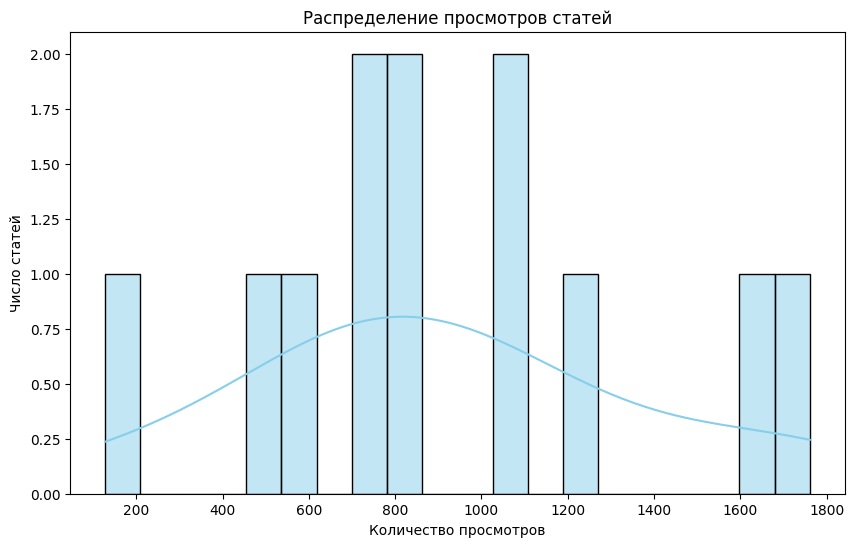

In [95]:
# Гистограмма просмотров
plt.figure(figsize=(10, 6))
sns.histplot(data_articles['views'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Распределение просмотров статей')
plt.xlabel('Количество просмотров')
plt.ylabel('Число статей')
plt.show()

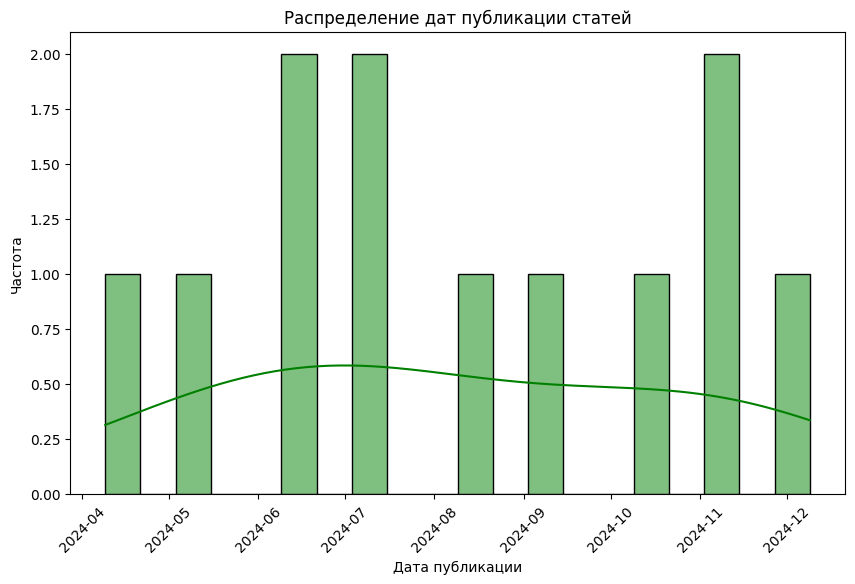

In [96]:
# Гистограмма для даты публикации
plt.figure(figsize=(10, 6))
sns.histplot(data_articles['published_date'], bins=20, color='green', kde=True)
plt.title('Распределение дат публикации статей')
plt.xlabel('Дата публикации')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

# 2. Исследование взаимосвязи между характеристиками статей

 1.  Расчёт корреляции между показателями




In [101]:
# Преобразование строк в datetime
data_articles['published_date'] = pd.to_datetime(data_articles['published_date'])

In [107]:
# Пример преобразования даты в числовой формат
data_articles['published_date_numeric'] = (data_articles['published_date'] - data_articles['published_date'].min()).dt.days

# Расчёт корреляции между просмотрами и числовым представлением даты публикации
correlation = data_articles[['views', 'published_date_numeric']].corr()
print(correlation)

                           views  published_date_numeric
views                   1.000000               -0.797506
published_date_numeric -0.797506                1.000000


2. Регрессионный анализ

In [106]:
# Объявление зависимой и независимой переменной
X = data_articles['published_date_numeric']
y = data_articles['views']

# Добавление константы для линейной модели
X = sm.add_constant(X)

# Создание модели и её подгонка
model = sm.OLS(y, X).fit()

# Вывод результатов
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     17.47
Date:                Thu, 12 Sep 2024   Prob (F-statistic):            0.00189
Time:                        18:54:06   Log-Likelihood:                -84.048
No. Observations:                  12   AIC:                             172.1
Df Residuals:                      10   BIC:                             173.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1482

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)
